In [1]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
import sys
import os
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

path_sav_fig = f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/code/eESAndpESDiscrimination/figure/"
if not os.path.isdir(path_sav_fig):
    os.mkdir(path_sav_fig)

key_Energy = "Erec"
key_tag = "evtType"
dir_map_tags = {0:"pES", 1:"eES"}

# Load Prediction Outputs
with np.load(f"/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/code/eESAndpESDiscrimination/predict_Combine.npz",
             allow_pickle=True) as f:
    dir_events = f["dir_events"].item()
    dir_train = f["dir_train"].item()


# Erec_max = max( dir_events[key_Energy] )
Erec_max = 12.5
dir_diff_option_for_events = {"Without IBDp":dir_events}
print(dir_events[key_Energy])

[0.59984565 0.19515115 0.35027066 ... 0.18072918 0.37840062 0.38591179]


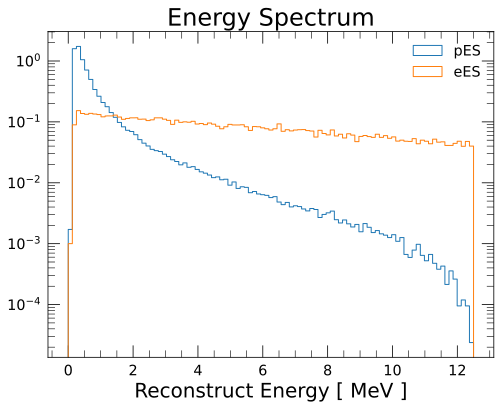

In [2]:
bins_equen= np.linspace(0, Erec_max ,100)
for tag in dir_map_tags.keys():
    plt.hist(dir_events[key_Energy][dir_events[key_tag]==tag],bins=bins_equen, histtype="step", label=dir_map_tags[tag],
             density=True)
plt.xlabel("Reconstruct Energy [ MeV ]")
plt.title("Energy Spectrum")
plt.semilogy()
plt.legend()


dict_keys(['evtID', 'h_time_without_charge', 'h_time_with_charge', 'XYZ', 'Erec', 'evtID_PSD', 'evtType', 'R3', 'PSD'])
dict_keys(['evtID', 'h_time_without_charge', 'h_time_with_charge', 'XYZ', 'Erec', 'evtID_PSD', 'evtType', 'R3', 'PSD'])
{'train': Counter({0: 22549, 1: 22549}), 'test': Counter({0: 332946, 1: 27562}), 'total': Counter({0: 355495, 1: 50111})}
dict_keys(['evtID', 'h_time_without_charge', 'h_time_with_charge', 'XYZ', 'Erec', 'evtID_PSD', 'evtType', 'R3'])
PSD Cut: 0.488
Optimized  Efficiency:
 pES inefficiency:	 1.000 % +- 0.017 
eES efficiency:	 96.966 % +- 0.1

Optimized  Ratio of Residue:
 pES Ratio:	 6.817 % +- 0.11 
eES Ratio:	 93.183 % +- 0.11

##############################################



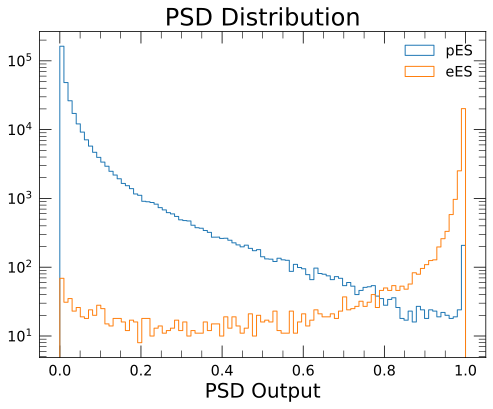

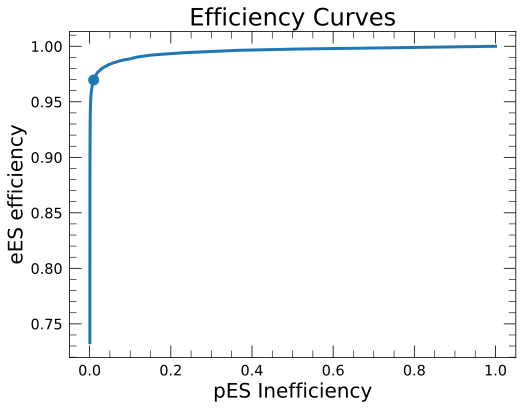

In [6]:
from importlib import reload
import DiscriminationTools
reload(DiscriminationTools)
from DiscriminationTools import  DiscriminationTools
discrimination_tool = DiscriminationTools(key_0="pES", key_1="eES")

print(dir_events.keys())

discrimination_tool.GetPredictionData("/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/code/eESAndpESDiscrimination/predict_Combine.npz")
discrimination_tool.GetPSDDistribution()
discrimination_tool.PlotROCCurves()
discrimination_tool.MaximumSignificance(v_bkg_ineff=np.linspace(0.01, 0.2,1000), condition="Total Samples", set_global_PSD_cut=True)




PSD Cut: 0.689
Optimized  Efficiency:
 pES inefficiency:	 0.379 % +- 0.011 
eES efficiency:	 45.234 % +- 0.3

Optimized  Ratio of Residue:
 pES Ratio:	 42.637 % +- 1.3 
eES Ratio:	 57.363 % +- 1.3

##############################################

PSD Cut: 0.488
Certain PSD Cut  Efficiency:
 pES inefficiency:	 0.918 % +- 0.017 
eES efficiency:	 58.381 % +- 0.3

Certain PSD Cut  Ratio of Residue:
 pES Ratio:	 58.240 % +- 0.95 
eES Ratio:	 41.760 % +- 0.95

##############################################

PSD Cut: 0.687
Optimized  Efficiency:
 pES inefficiency:	 0.319 % +- 0.0098 
eES efficiency:	 75.922 % +- 0.26

Optimized  Ratio of Residue:
 pES Ratio:	 11.937 % +- 0.8 
eES Ratio:	 88.063 % +- 0.8

##############################################

PSD Cut: 0.488
Certain PSD Cut  Efficiency:
 pES inefficiency:	 0.911 % +- 0.016 
eES efficiency:	 82.797 % +- 0.23

Certain PSD Cut  Ratio of Residue:
 pES Ratio:	 26.188 % +- 0.96 
eES Ratio:	 73.812 % +- 0.96

#################################

No handles with labels found to put in legend.


PSD Cut: 0.72
Optimized  Efficiency:
 pES inefficiency:	 0.200 % +- 0.0077 
eES efficiency:	 99.948 % +- 0.014

Optimized  Ratio of Residue:
 pES Ratio:	 0.462 % +- 0.17 
eES Ratio:	 99.538 % +- 0.17

##############################################

PSD Cut: 0.488
Certain PSD Cut  Efficiency:
 pES inefficiency:	 1.081 % +- 0.018 
eES efficiency:	 100.000 % +- 0

Certain PSD Cut  Ratio of Residue:
 pES Ratio:	 2.448 % +- 0.39 
eES Ratio:	 97.552 % +- 0.39

##############################################



,index,eES Eff.,pES Ineff.,(eES Residue)/(Total Residue),(pES Residue)/(Total Residue),PSD Cut,N_eES,N_pES
0,Total Samples,96.966 % +- 0.1,1.000 % +- 0.017,93.183 % +- 0.11,6.817 % +- 0.11,0.49,50111,355495
1,0.20 < $E_{rec}$ < 0.51 MeV,45.234 % +- 0.3,0.379 % +- 0.011,57.363 % +- 1.3,42.637 % +- 1.3,0.69,1924,170737
2,0.20 < $E_{rec}$ < 0.51 MeV(Global Cut),58.381 % +- 0.3,0.918 % +- 0.017,41.760 % +- 0.95,58.240 % +- 0.95,0.49,1924,170737
3,0.51 < $E_{rec}$ < 0.82 MeV,75.922 % +- 0.26,0.319 % +- 0.0098,88.063 % +- 0.8,11.937 % +- 0.8,0.69,1885,60792
4,0.51 < $E_{rec}$ < 0.82 MeV(Global Cut),82.797 % +- 0.23,0.911 % +- 0.016,73.812 % +- 0.96,26.188 % +- 0.96,0.49,1885,60792
5,0.82 < $E_{rec}$ < 1.13 MeV,90.239 % +- 0.18,0.259 % +- 0.0088,95.441 % +- 0.53,4.559 % +- 0.53,0.64,1668,27719
6,0.82 < $E_{rec}$ < 1.13 MeV(Global Cut),93.530 % +- 0.15,0.607 % +- 0.013,90.262 % +- 0.71,9.738 % +- 0.71,0.49,1668,27719
7,1.13 < $E_{rec}$ < 1.44 MeV,95.275 % +- 0.13,0.439 % +- 0.011,95.584 % +- 0.5,4.416 % +- 0.5,0.55,1706,17120
8,1.13 < $E_{rec}$ < 1.44 MeV(Global Cut),96.264 % +- 0.11,0.653 % +- 0.014,93.628 % +- 0.58,6.372 % +- 0.58,0.49,1706,17120
9,1.44 < $E_{rec}$ < 1.76 MeV,98.263 % +- 0.079,0.299 % +- 0.0095,98.076 % +- 0.34,1.924 % +- 0.34,0.59,1641,10573


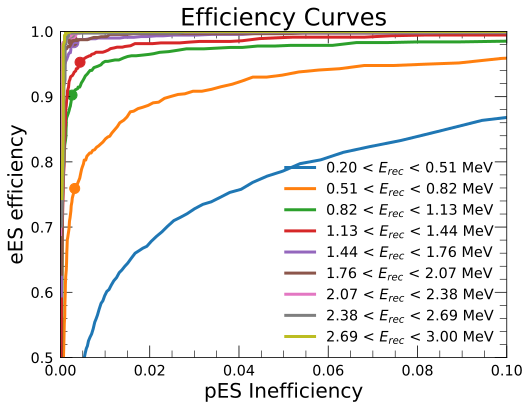

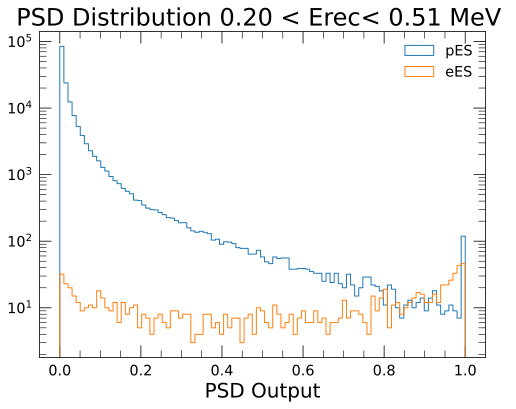

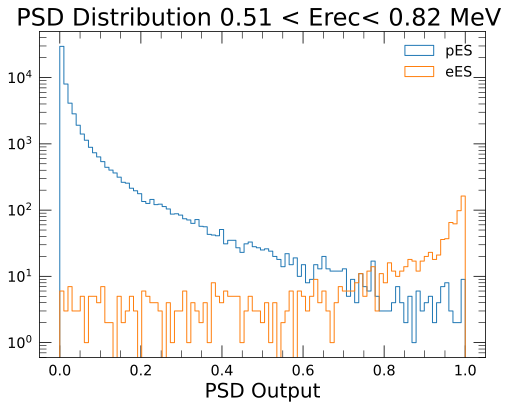

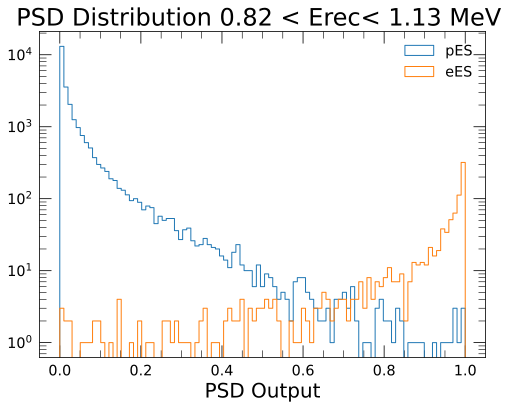

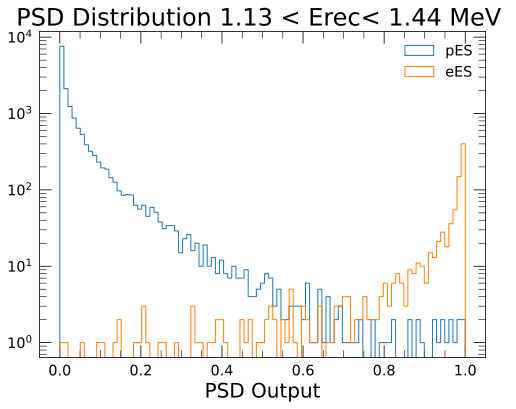

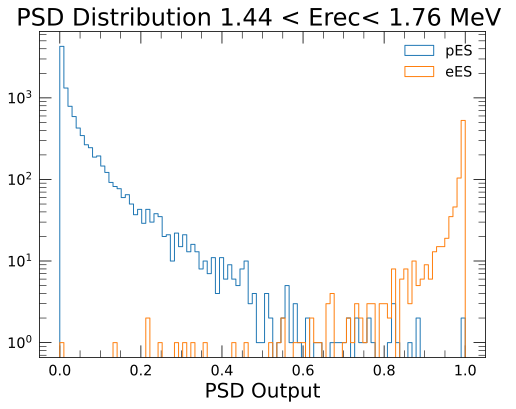

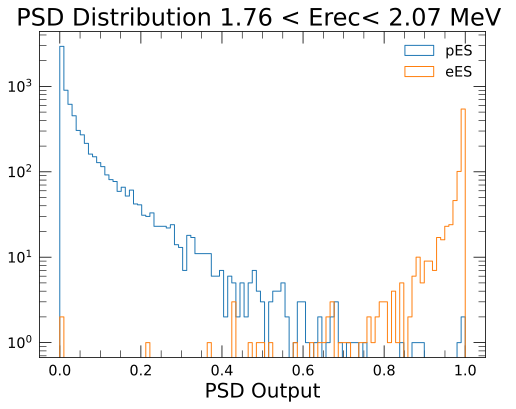

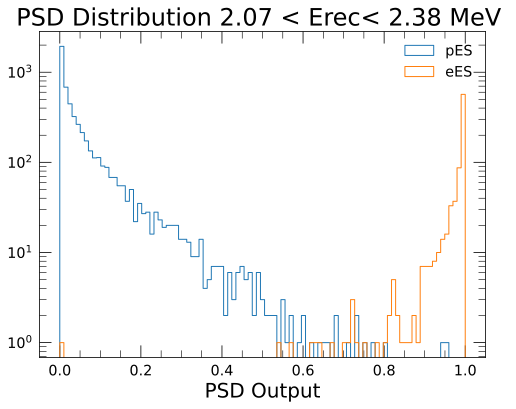

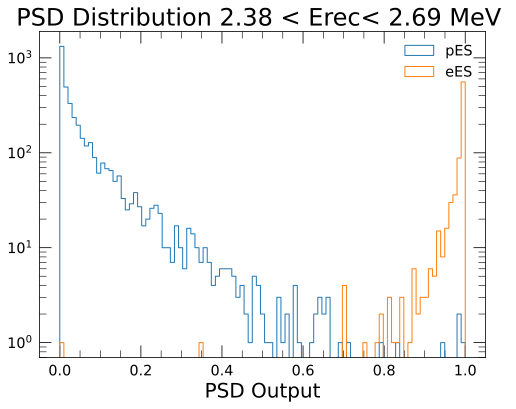

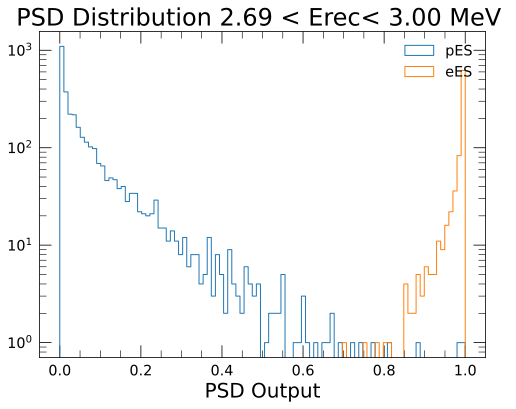

In [7]:
discrimination_tool.PlotROCCurvesDiffEBins(bins_Energy=np.linspace(0.2, 3, 10), xlim=(0, 0.1), ylim=(0.5,1),
                                           v_bkg_ineff=np.linspace(0.001, 0.2,1000))
discrimination_tool.PrintEffDataframe()